In [5]:
from error_generators import *
from scipy.linalg import expm, logm

In [6]:
from pygsti.modelpacks import smq1Q_XZ as std

In [14]:
target = std.target_model()
Gx = target[('Gxpi2', 0)].to_dense()
Gz = target[('Gzpi2', 0)].to_dense()

In [17]:
logm(Gx)

array([[ 0.00000000e+00,  0.00000000e+00,  7.96907102e-18,
         7.96907102e-18],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -2.47583931e-16,
        -1.57079633e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.57079633e+00,
        -1.96505279e-16]])

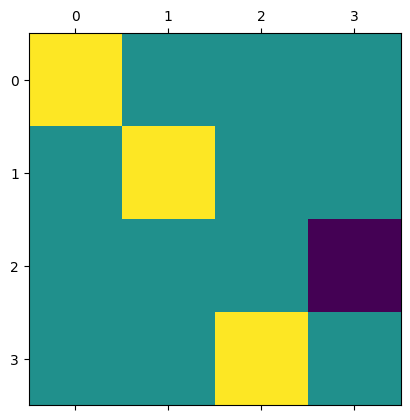

In [15]:
plt.matshow(Gx)

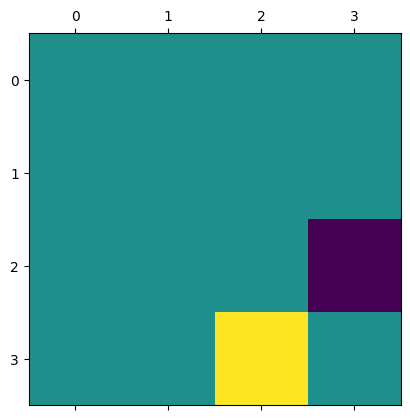

In [16]:
plt.matshow(logm(Gx))

In [2]:
egen_base = ErrorGen(1)


/home/jpmarceaux/PycharmProjects/AnalyticErrorAnalysis/venv/lib/python3.10/site-packages/pygsti/modelmembers/operations/lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")


In [3]:
egen_base.vec

[{H}^{X}_{Gq0},
 {H}^{Y}_{Gq0},
 {H}^{Z}_{Gq0},
 {S}^{X}_{Gq0},
 {C}^{XxY}_{Gq0},
 {A}^{XxY}_{Gq0},
 {C}^{XxZ}_{Gq0},
 {A}^{XxZ}_{Gq0},
 {S}^{Y}_{Gq0},
 {C}^{YxZ}_{Gq0},
 {A}^{YxZ}_{Gq0},
 {S}^{Z}_{Gq0}]

In [18]:
Hx = egen_base.vec[0]
Hy = egen_base.vec[1]
Hz = egen_base.vec[2]
mat_Hx = egen_base.feature_of_param(Hx)
mat_Hy = egen_base.feature_of_param(Hy)
mat_Hz = egen_base.feature_of_param(Hz)


In [19]:
mat_Hz

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0., -2.,  0.],
       [ 0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

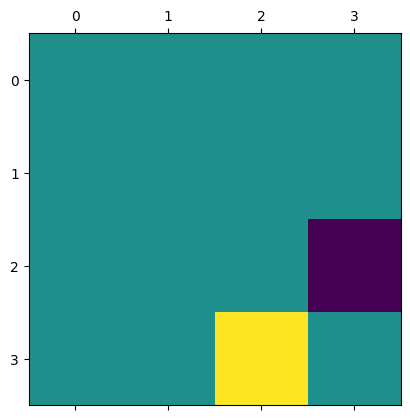

In [20]:
plt.matshow(mat_Hx)

In [25]:
GxGz_generator = mat_Hx + mat_Hz + np.pi/2*mat_Hy

In [47]:
commutators = []
for idx, x in enumerate(egen_base.features):
    comm = GxGz_generator@x - x@GxGz_generator
    comm_string = 0
    for id_dual, dx in enumerate(egen_base.dual_features):
        coef = np.trace(dx@comm)
        comm_string += coef*egen_base.vec[id_dual]
    commutators.append((egen_base.vec[idx], comm_string))

In [48]:
from IPython.display import display

In [49]:
commutators

[({H}^{X}_{Gq0}, -2.0*{H}^{Y}_{Gq0} + 3.14159265358979*{H}^{Z}_{Gq0}),
 ({H}^{Y}_{Gq0}, 2.0*{H}^{X}_{Gq0} - 2.0*{H}^{Z}_{Gq0}),
 ({H}^{Z}_{Gq0}, -3.14159265358979*{H}^{X}_{Gq0} + 2.0*{H}^{Y}_{Gq0}),
 ({S}^{X}_{Gq0}, 2.0*{C}^{XxY}_{Gq0} - 3.14159265358979*{C}^{XxZ}_{Gq0}),
 ({C}^{XxY}_{Gq0},
  2.0*{C}^{XxZ}_{Gq0} - 3.14159265358979*{C}^{YxZ}_{Gq0} - 4.0*{S}^{X}_{Gq0} + 4.0*{S}^{Y}_{Gq0}),
 ({A}^{XxY}_{Gq0}, -2.0*{A}^{XxZ}_{Gq0} - 3.14159265358979*{A}^{YxZ}_{Gq0}),
 ({C}^{XxZ}_{Gq0},
  -2.0*{C}^{XxY}_{Gq0} + 2.0*{C}^{YxZ}_{Gq0} + 6.28318530717959*{S}^{X}_{Gq0} - 6.28318530717959*{S}^{Z}_{Gq0}),
 ({A}^{XxZ}_{Gq0}, 2.0*{A}^{XxY}_{Gq0} - 2.0*{A}^{YxZ}_{Gq0}),
 ({S}^{Y}_{Gq0}, -2.0*{C}^{XxY}_{Gq0} + 2.0*{C}^{YxZ}_{Gq0}),
 ({C}^{YxZ}_{Gq0},
  3.14159265358979*{C}^{XxY}_{Gq0} - 2.0*{C}^{XxZ}_{Gq0} - 4.0*{S}^{Y}_{Gq0} + 4.0*{S}^{Z}_{Gq0}),
 ({A}^{YxZ}_{Gq0}, 3.14159265358979*{A}^{XxY}_{Gq0} + 2.0*{A}^{XxZ}_{Gq0}),
 ({S}^{Z}_{Gq0}, 3.14159265358979*{C}^{XxZ}_{Gq0} - 2.0*{C}^{YxZ}_{Gq0})]

In [40]:
for c in commutators:
    display(c[0], c[1])

TypeError: 'int' object is not subscriptable

In [43]:
commutators[10]

0